### My name is Sahibjot Bhullar(113294299) and I am working alone on Project #2: Titanic - Who will survive?

In [258]:
#importing all the packages The was recomended in the Homeworks, and additional that I used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
from scipy import stats
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier


In [138]:
from google.colab import files # uploaded both csv file to google colab
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [259]:
orginalTestFile = pd.read_csv('test.csv')# Reads the file 
print(orginalTestFile)# the file has 418 rows x 11 columns

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [260]:
orginalTrainFile = pd.read_csv('train.csv')# Reads the file 
print(orginalTrainFile)# the file has 891 rows x 12 columns

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# EDA 

Cleaning the data

In [261]:
########################################### Dropping the cabin Column #################################################################

# Here I am Counting the number of missing values in cabin column
numMissingTrain = orginalTrainFile['Cabin'].isnull().sum()# null values in cabin column in train file 
numMissingTest = orginalTestFile['Cabin'].isnull().sum()# null values in cabin Test in train file 

print(f"The column 'Cabin' has {numMissingTrain} missing values in the train file out of 891 rows and {numMissingTest} in the test file out of 418 rows, so it is reasonable to drop the whole Cabin column because of the insufficient data in that column")

updatedTrainFile = orginalTrainFile.drop('Cabin', axis=1)# dropping the cabin column
updatedTestFile = orginalTestFile.drop('Cabin', axis=1)# dropping the cabin column

updatedTrainFile.to_csv("updatedTrainFile.csv")# making a file with no cabin file
updatedTestFile.to_csv("updatedTestFile.csv")# making a file with no cabin file

########################################### Dropping the missing age rows #################################################################
TrainAge = orginalTrainFile['Age'].isnull().sum()# null values in cabin column in train file 
TestAge = orginalTestFile['Age'].isnull().sum()# null values in cabin Test in train file 

print(f"The column 'Age' has {TrainAge} missing values in the train file out of 891 rows and {TestAge} in the test file out of 418 rows, so it is reasonable to drop the missing ages because the missing age rows are not alot")

updatedTrainFile.dropna(subset=['Age'], inplace=True)
updatedTrainFile.dropna(subset=['Age'], inplace=True)

# Print the updated DataFrame
print(updatedTrainFile)

The column 'Cabin' has 687 missing values in the train file out of 891 rows and 327 in the test file out of 418 rows, so it is reasonable to drop the whole Cabin column because of the insufficient data in that column
The column 'Age' has 177 missing values in the train file out of 891 rows and 86 in the test file out of 418 rows, so it is reasonable to drop the missing ages because the missing age rows are not alot
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Ow

**Exploring the socio-economic status of the passenger, and its relation to age, gender and number of family members**

 So to test the socio-economic status of the passenger, we can just use the fare as a guide to know the wealth of the passenger, as more wealthy people would buy more expensive tickets. My guess Passenger class 1 would have the wealthiest people.

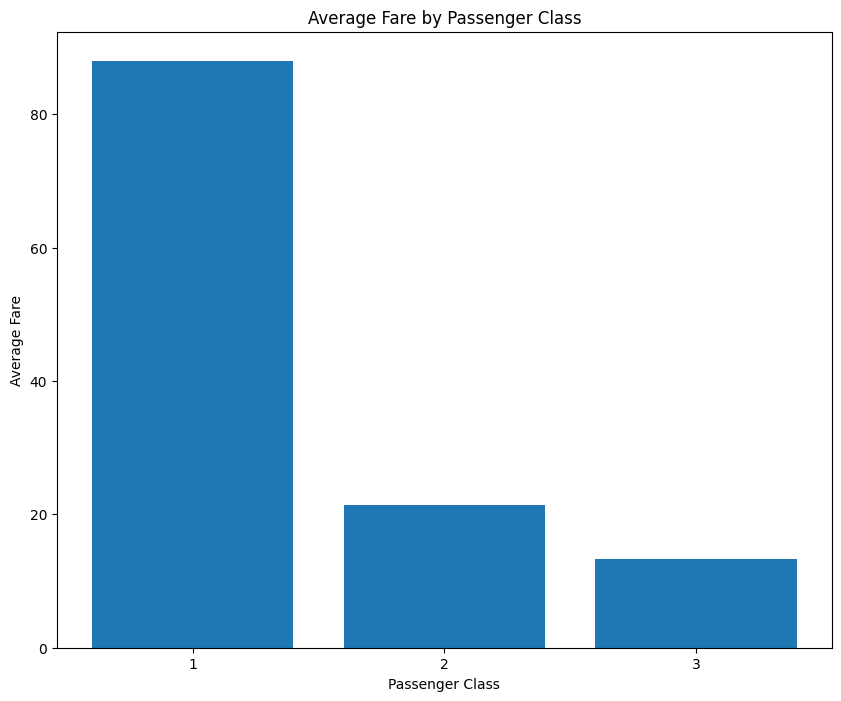

In [262]:
# Here I am calculating the mean Fare values for each Pclass to make sure that the class one payes the highest fare
meanFares = updatedTrainFile.groupby('Pclass')['Fare'].mean()
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(meanFares.index, meanFares.values)
ax.set_xticks([1, 2, 3])

ax.set_title('Average Fare by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Average Fare')

plt.show()
#########################################################################################################################
# This shows that the class 1 was indeed the wealthiest class, followed by class 2 then class 3.

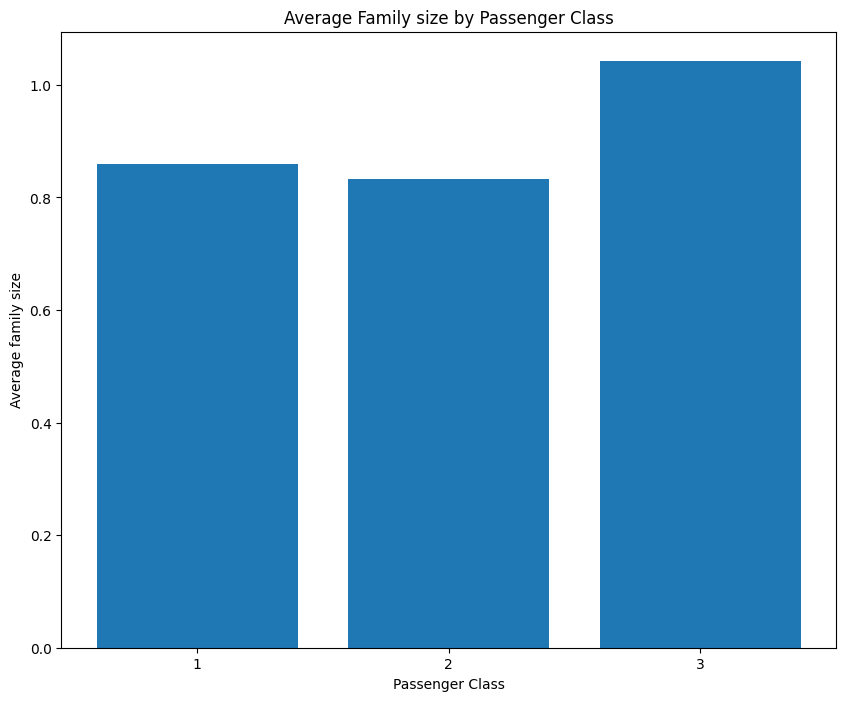

In [263]:
#First, I am going to make a new column for myself named total_family that adds the SibSp and Parch columns to find the estimated total family members 

FamilyTrainFile = updatedTrainFile.copy()  # make a copy of the original file
FamilyTrainFile['family'] = FamilyTrainFile['SibSp'] + FamilyTrainFile['Parch']  # add a new 'family' column
FamilyTrainFile.to_csv('FamilyTrainFile.csv', index=False)

meanFamily = FamilyTrainFile.groupby('Pclass')['family'].mean()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(meanFamily.index, meanFamily.values)
ax.set_xticks([1, 2, 3])

ax.set_title('Average Family size by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Average family size')

plt.show()
#########################################################################################################################

# This shows class one and 2 mostly had either couples or singles, while class 3 had more families

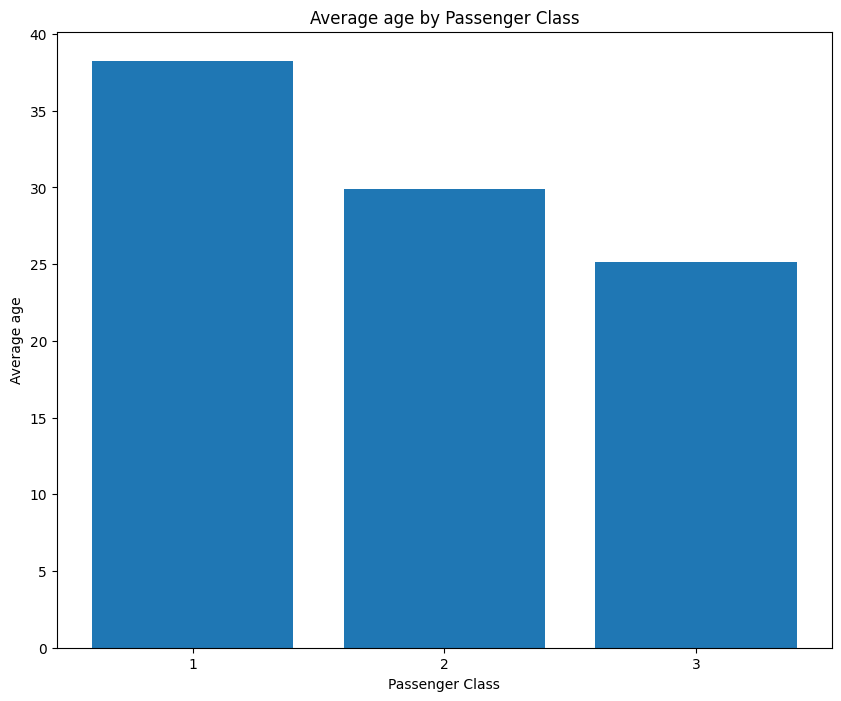

In [264]:
mean_age = updatedTrainFile.groupby('Pclass')['Age'].mean() # grouping class and age

# plotting the average age of each class
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(mean_age.index, mean_age.values)
ax.set_xticks([1, 2, 3])

ax.set_title('Average age by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Average age')

plt.show()
#########################################################################################################################

# Shows that class 1 had the older people while class 3 had the youngest. This was expected as generally wealthy people tend to be older as thier is direct relationship between age and wealth 

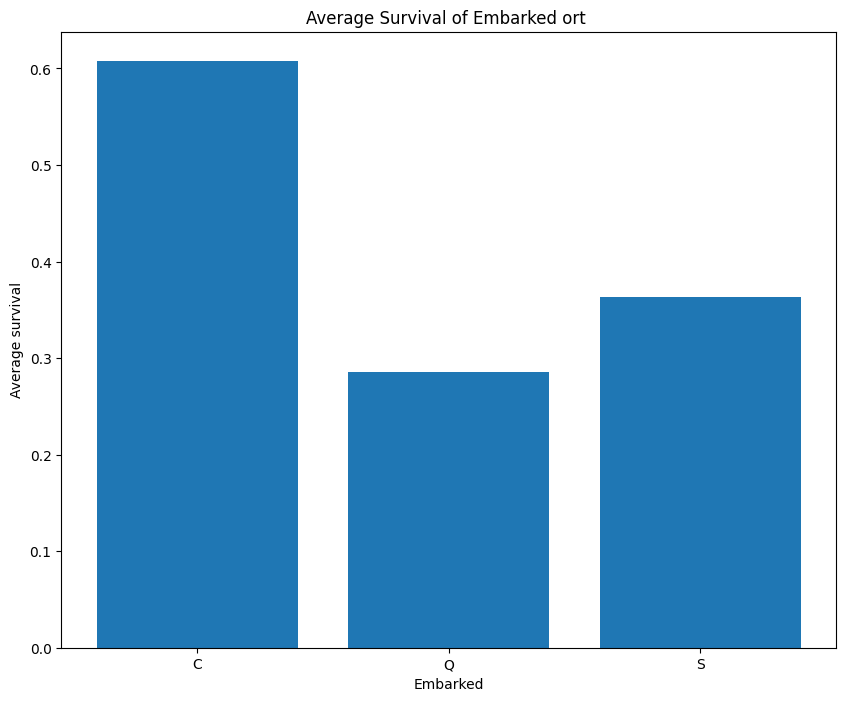

In [265]:
embarked = updatedTrainFile.groupby('Embarked')['Survived'].mean() # grouping class and age

# plotting the average age of each class
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(embarked.index, embarked.values)

ax.set_title('Average Survival of Embarked ort ')
ax.set_xlabel('Embarked')
ax.set_ylabel('Average survival')

plt.show()

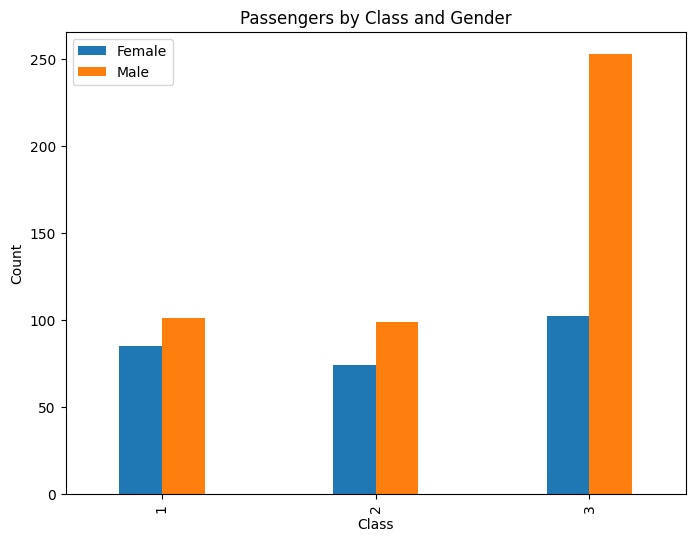

In [266]:
age = updatedTrainFile.groupby(['Pclass', 'Sex']).size().unstack()# Grouping the data by "Pclass" and "Sex" columns and counting the number of passengers in each class

fig, ax = plt.subplots(figsize=(8, 6))
age.plot(kind='bar', width=0.4, ax=ax)# female and male bars would be next to each other 

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Passengers by Class and Gender')

ax.legend(['Female', 'Male'])# adding key

plt.show()

#########################################################################################################################

# Passenger class 1 which is the most prestige class seems to have equal number of male and female because it prob had alot of couples and famlies, whereas class 3 had more more then
# double the amount of males then feamle. This is probably because class 3 had the youngest age group who were not married and at that time females did not travel alone.

Exploring the distribution of survival victims in relation to age and gender.

<ipython-input-267-46f89cd2f1f2>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(female[female['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False,color="green") # if its a female and they survived make the bar green
<ipython-input-267-46f89cd2f1f2>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

Text(0.5, 1.0, 'Male')

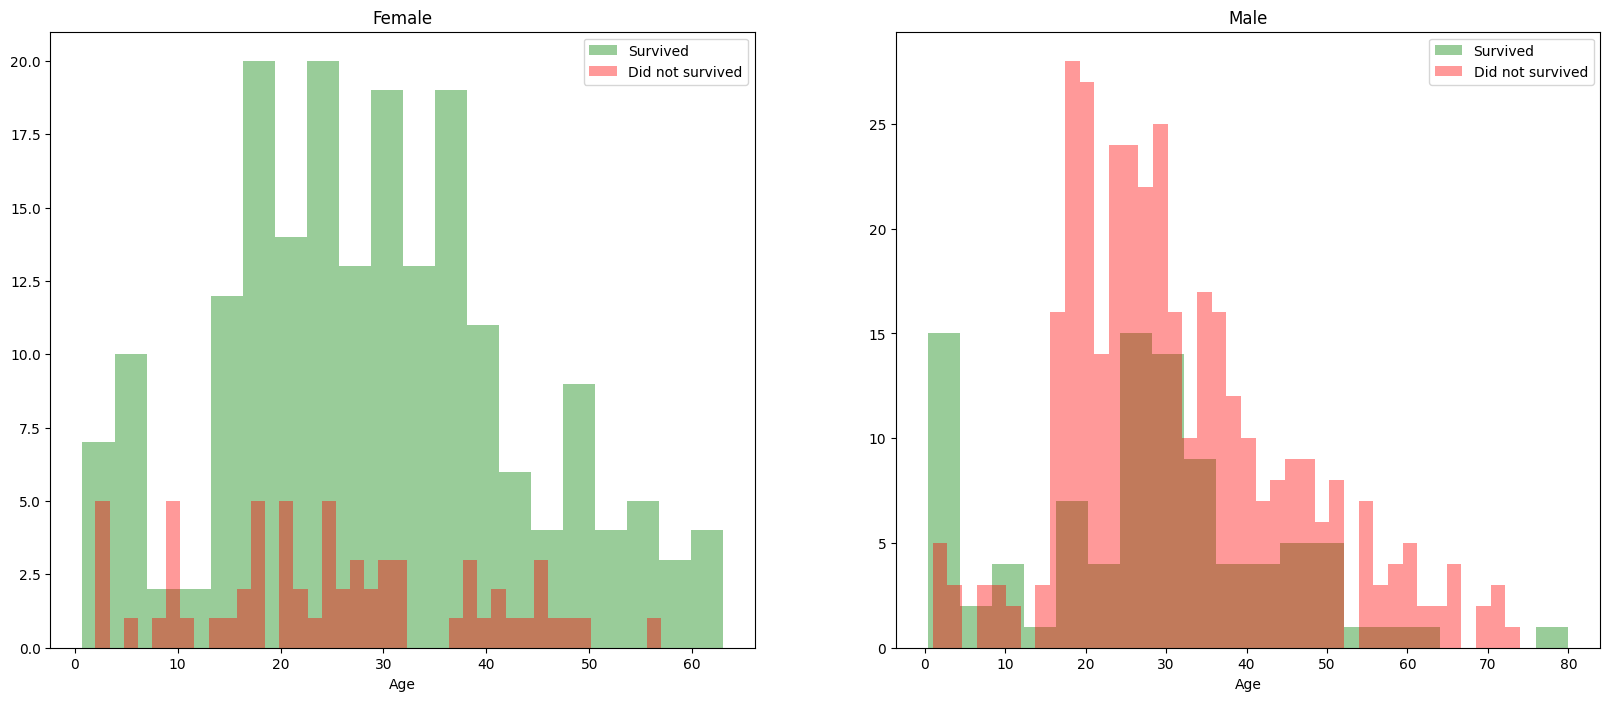

In [267]:
# adding labels
survived = 'Survived' 
not_survived = 'Did not survived'

# making the plot and the subplots so they are all printed in the same plot
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))

#assigning female and male using column sex
female = updatedTrainFile[updatedTrainFile['Sex']=='female']
male = updatedTrainFile[updatedTrainFile['Sex']=='male']

ax = sb.distplot(female[female['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False,color="green") # if its a female and they survived make the bar green
ax = sb.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False,color="red")# if its a female and they did not survived make the bar red
ax.legend()
ax.set_title('Female')

ax = sb.distplot(male[male['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False,color="green")# if its a male and they survived make the bar green
ax = sb.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False,color="red")# if its a male and they did not survived make the bar red
ax.legend()
ax.set_title('Male')

<ipython-input-268-518104f4f999>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(women[women['Survived'] == 1].Age.dropna(), bins=20, label=survived, ax=axes[0], kde=False, color="green")
<ipython-input-268-518104f4f999>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(women[women['Su

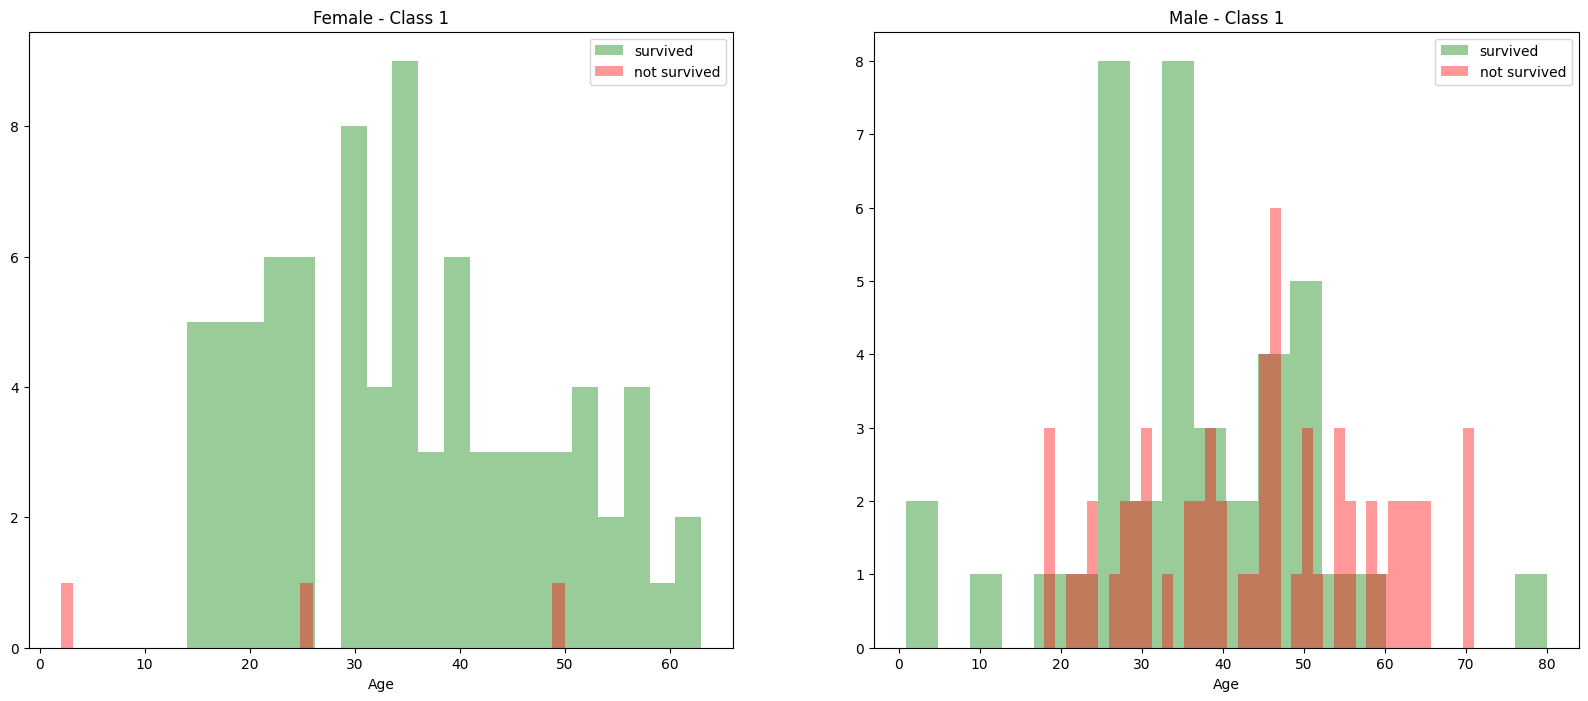

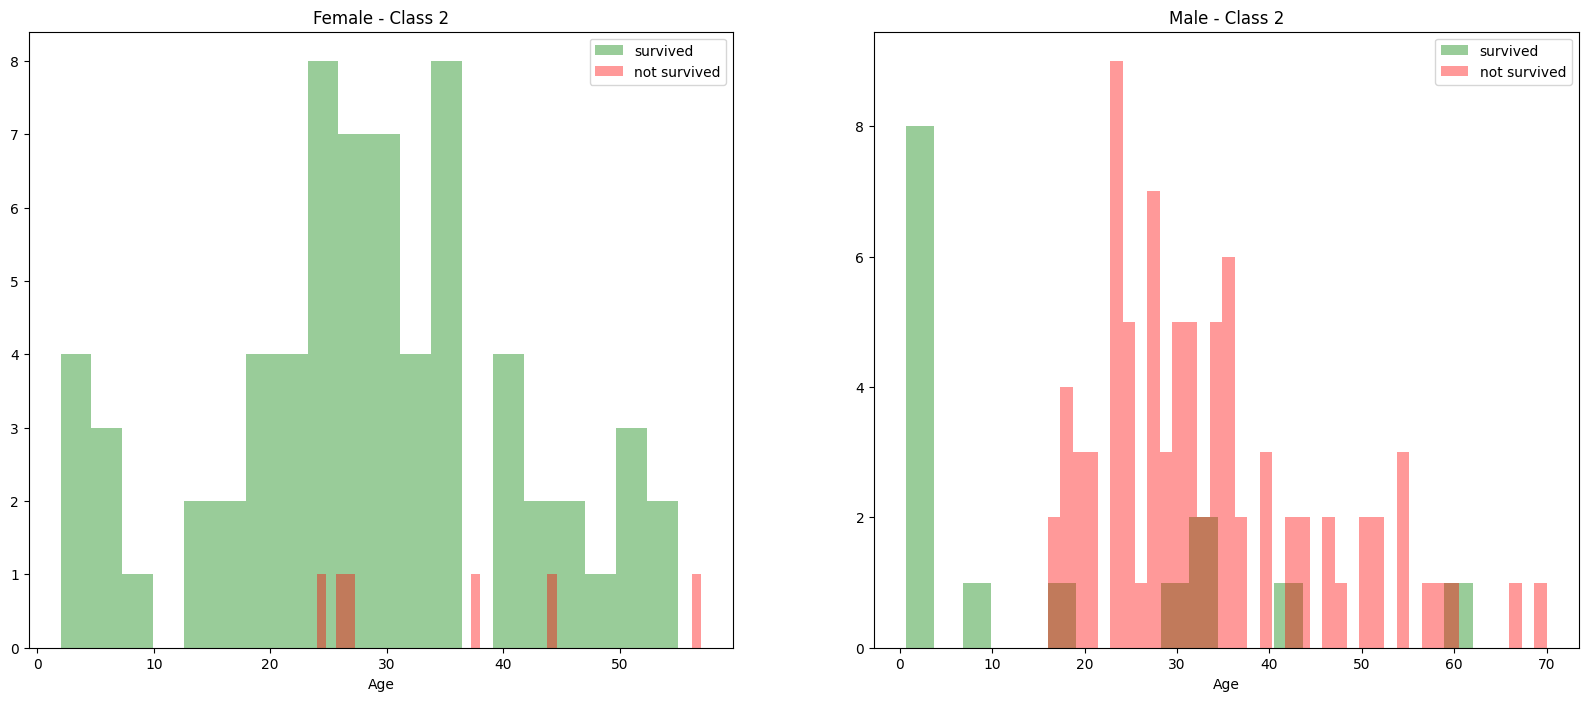

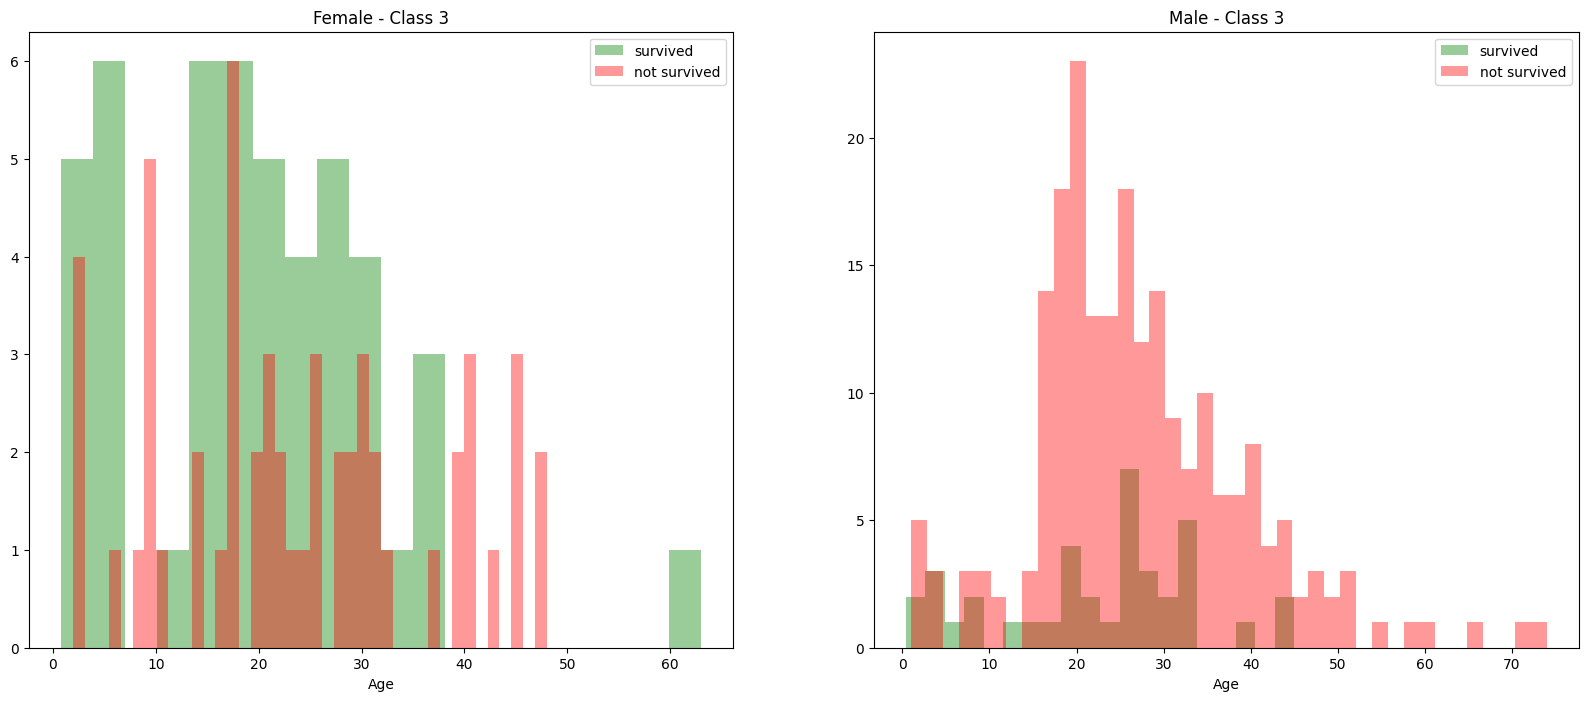

In [268]:
# adding labels
survived = 'survived'
not_survived = 'not survived'

classes = [1, 2, 3] # making class array

for pclass in classes: # rather then doing it for each class going to use a foor loop to  itterat through each class array
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))# makes plot for each class

    women = updatedTrainFile[(updatedTrainFile['Sex'] == 'female') & (updatedTrainFile['Pclass'] == pclass)]# using the sex column to get the values for male and female
    men = updatedTrainFile[(updatedTrainFile['Sex'] == 'male') & (updatedTrainFile['Pclass'] == pclass)]#

    # same as above code
    #women
    ax = sb.distplot(women[women['Survived'] == 1].Age.dropna(), bins=20, label=survived, ax=axes[0], kde=False, color="green")
    ax = sb.distplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color="red")
    ax.legend()

    ax.set_title('Female - Class {}'.format(pclass))# have to format because the for loop covers each class without doing this for every class

    #men
    ax = sb.distplot(men[men['Survived'] == 1].Age.dropna(), bins=20, label=survived, ax=axes[1], kde=False, color="green")
    ax = sb.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False, color="red")
    ax.legend()
    ax.set_title('Male - Class {}'.format(pclass))

    plt.show()

# Described the analysis of the graphs on my slides

**correlation analysis**

In [269]:
#### seeing the correlation between classes and suviving 

updatedTrainFile['Pclass'] = updatedTrainFile['Pclass'].map({0: 0, 1: 1, 2: 2})
corr = updatedTrainFile['Survived'].corr(updatedTrainFile['Pclass'])
print('Correlation coefficient for Pclass:', corr)


Correlation coefficient for Pclass: -0.17783327515294556


In [270]:

corr = updatedTrainFile['Survived'].corr(updatedTrainFile['Fare'])
print('Correlation coefficient for fare:', corr)

corr = updatedTrainFile['Survived'].corr(updatedTrainFile['Age'])
print('Correlation coefficient for age:', corr)

corr = updatedTrainFile['Survived'].corr(updatedTrainFile['SibSp'])
print('Correlation coefficient for SibSp:', corr)

corr = updatedTrainFile['Survived'].corr(updatedTrainFile['Parch'])
print('Correlation coefficient for Parch:', corr)



Correlation coefficient for fare: 0.26818861687447876
Correlation coefficient for age: -0.07722109457217768
Correlation coefficient for SibSp: -0.01735836047953421
Correlation coefficient for Parch: 0.09331700774224293


In [271]:
# Calculate the correlation between 'Survived' and 'Embarked'

updatedTrainFile['Embarked'] = updatedTrainFile['Embarked'].map({'Q': 0, 'S': 1,"C":2})
corr = updatedTrainFile['Survived'].corr(updatedTrainFile['Embarked'])

# Print the correlation coefficient
print('Correlation coefficient for Embarked:', corr)

Correlation coefficient for Embarked: 0.18965701031536228


In [272]:
# Calculate the correlation between 'Survived' and 'sex'

updatedTrainFile['Sex'] = updatedTrainFile['Sex'].map({'male': 0, 'female': 1})
corr = updatedTrainFile['Survived'].corr(updatedTrainFile['Sex'])

# Print the correlation coefficient
print('Correlation coefficient for sex:', corr)

Correlation coefficient for sex: 0.5388255930146364


# Modeling and Question Answering

**Described each models on powerpoint**

# How can you extract information from the non-numerical features?

 In the followig section I have to train my models on columns that dont have a numerical value, so I had to use the follwoing library from sklearn.preprocessing import OneHotEncoder to encode the columns with non numerical value into labels of number

In [273]:
###### Making the file suitable to train models on it.
survival_data = pd.read_csv('updatedTrainFile.csv')# Reads the file 
survival_data.drop(['Name', 'Ticket'], axis=1, inplace=True)# dropping the values that dont help with training
survival_data.dropna(subset=['Age', 'Embarked'], inplace=True)# Droping rows with missing values in Age and Embarked columns

survival_data['Sex'] = survival_data['Sex'].map({'female': 1, 'male': 0}) # Encoding Sex column 1 for female and 0 for male 

embarked_encoded = pd.get_dummies(survival_data['Embarked'], prefix='Embarked')# Encode the Embarked column
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])
survival_data = pd.concat([survival_data, embarked_encoded_df], axis=1)
survival_data.drop('Embarked', axis=1, inplace=True)


In [274]:
################################# logistic reg model ##############################################
survival_data_log=survival_data

# Split the data into training and testing sets
X = survival_data_log[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] # trains the model on these column
y = survival_data_log['Survived'] # want to predict the survival 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # As recomeneded using 80% of the data to train and testing on the rest
# random_state is set to 42 so we essure we get same result everytime we run it

# Here I will Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)# Make the predictions on the test set

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.8041958041958042
Precision: 0.8431372549019608
Recall: 0.6825396825396826
F1 score: 0.7543859649122807


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [275]:

################################# Random Forest ##############################################

survival_data_Rf=survival_data

# Split the data into training and testing sets
X = survival_data_log[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] # trains the model on these column
y = survival_data_log['Survived'] # want to predict the survival 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # As recomeneded using 80% of the data to train and testing on the rest
# random_state is set to 42 so we essure we get same result everytime we run it

rfc = RandomForestClassifier(n_estimators=100, random_state=42)# Training the Random Forest classifier with 100 trees as a base case
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.7622377622377622
Precision: 0.7543859649122807
Recall: 0.6825396825396826
F1 score: 0.7166666666666668


In [276]:
################################# Nearest Neighbor  ##############################################


survival_data_NN=survival_data

# Split the data into training and testing sets
X = survival_data_log[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] # trains the model on these column
y = survival_data_log['Survived'] # want to predict the survival 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # As recomeneded using 80% of the data to train and testing on the rest
# random_state is set to 42 so we essure we get same result everytime we run it

knn = KNeighborsClassifier(n_neighbors=5)# Train a KNN model with 5 neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.6923076923076923
Precision: 0.6461538461538462
Recall: 0.6666666666666666
F1 score: 0.65625
